# FINDER on synthetic datasets
-------------------------------------

In the short notebook we will see how to generate a synthetic dataset, based on true recordings of DNA origami.
The `Geometry` package allows us to arrange this sample in different shapes and control the amount of noise.


## Generating synthetic data

Our dataset will be based on true recordings, so first we need to access them.
We have four different options, all stored in the `./data_sources` directory.


In [1]:
import os
import sys 

sys.path.append("Modules/")

data_folder = os.path.join(os.getcwd(),"data_sources")

clusters_library = {
    "1mers": "Clusters_DNA_1mers",
    "3mers": "Clusters_DNA_3mers",
    "4mers": "Clusters_DNA_4mers",
    "neuron": "Clusters_Neuron"
}

We have three classes in the `Geometry` module.

* `Geometry_Free` arranges the samples freely and randomly;
* `Geometry_Grid` arranges the samples in a grid;
* `Geometry_Path` arranges the sample in a sinusoidal shape;

let's import them!

In [2]:
from Geometry import Geometry_Path, Geometry_Grid, Geometry_Free

Let's see the various possibilities we have.


### Arranging 1-mers randomly

In [3]:
G = Geometry_Free(basefolder=data_folder, # the folder in which the data is stored
                  unitCluster_Library=clusters_library["1mers"] #the cluster library we are using
                  , noise_ratio=0.1  # add 1 noise point for every 10 real points
                  )
G.GeneratePoints(seed=42)

Loaded 29 template clusters..
Loaded 29 template clusters..


We can use the `plotScatter` function to plot the result.

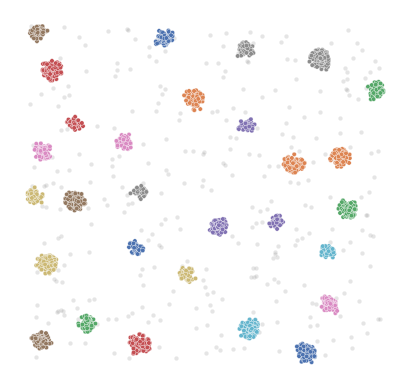

In [4]:
G.plotScatter()

### Arranging 3-mers on a grid

Loaded 155 template clusters..
Loaded 155 template clusters..


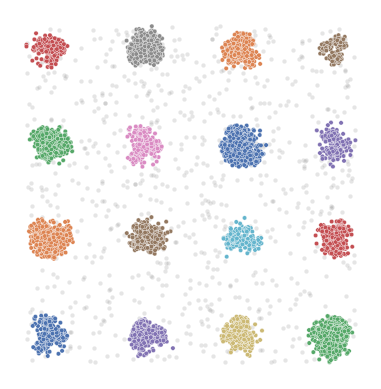

In [5]:
G = Geometry_Grid(data_folder, unitCluster_Library=clusters_library['3mers'],
                  noise_ratio=0.1, # add 1 noise point for every 10 real points
                  n_side=4 # make a 4x4 grid
                  )
G.GeneratePoints(seed=42)
G.plotScatter()

### Arranging 4-mers on a sinusoidal shape


Loaded 44 template clusters..
Loaded 44 template clusters..


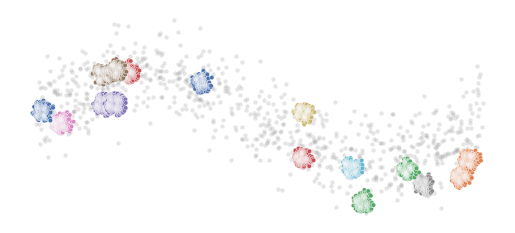

In [6]:
G = Geometry_Path(data_folder, unitCluster_Library=clusters_library['4mers'])
G.GeneratePoints(seed=42,
                 N_clusters=16, #number of clusters we want to generate
                 N_Noise= 16*50) #generate 50 moise points for each cluster
G.plotScatter()

# Using FINDER
-----------------------------------------

Now we will use `FINDER` to label our data.
First let us generate them, using `Geometry` as we saw above:

In [7]:
cluster_type = "3mers"
geometry_type = "grid"

seed = 42

if geometry_type == "free":
    G = Geometry_Free(data_folder, unitCluster_Library=clusters_library[cluster_type], noise_ratio=0.1)
    G.GeneratePoints(seed=seed)

elif geometry_type == "path":
    G = Geometry_Path(data_folder, unitCluster_Library=clusters_library[cluster_type])
    G.GeneratePoints(seed=seed,N_clusters=16, N_Noise= 16*20)

elif geometry_type == "grid":
    G = Geometry_Grid(data_folder, unitCluster_Library=clusters_library[cluster_type], noise_ratio=0.1, n_side=5)
    G.GeneratePoints(seed=seed)

Loaded 155 template clusters..
Loaded 155 template clusters..


Note that we can easily access the points:

In [8]:
X = G.XC
X

array([[-17.07536722, -52.90375444],
       [-12.68296722, -37.35655444],
       [-11.78236722, -63.78995444],
       ...,
       [295.57409257, 295.32104826],
       [841.06646461,  10.13788601],
       [704.008532  , 793.73481499]])

or the labels

In [9]:
labels_true = G.labels_groundtruth

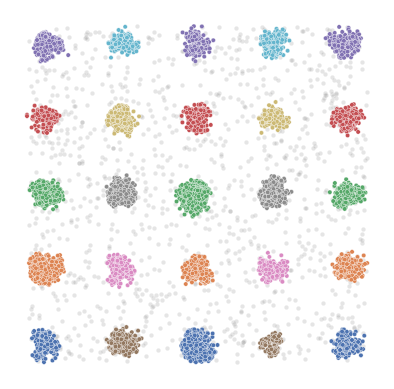

In [10]:
G.plotScatter()

### FINDER

In order to use `FINDER` we need to import it first.
Since it uses the `sklearn` API, we simply first define the model with the various parameters.

In [11]:
from finder import Finder

model = Finder(similarity_score_computation="threshold")

and then we call the function `fit()` to fit our data.

In [12]:
labels_finder = model.fit(X)

Analysing 12733 points
Boundaries for sigma    : 3.4025494993567604 , 21.197059808916503
Sigmas are:
[ 3.4025495   3.87750524  4.41875918  5.03556579  5.73847132  6.53949417
  7.45233034  8.49258766  9.67805263 11.02899451 12.56851192 14.32292779
 16.3222394  18.6006313  21.19705981]
Thresholds are:
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 Complete

KeyboardInterrupt: 

The parameters selected by the algorithm can be easily accessed

In [ ]:
model.selected_parameters

Let's see how it performs

In [ ]:
G.plotScatter(labels_finder)

Notice how `FINDER` is able to identify some _sub-clusters_ that constitutes our dataset:
since we used "3-mers", we expect a clustering algorithm to identify 3 clusters for each DNA-origami, and `FINDER` manages to identify most of them.


All the configurations of parameters that `FINDER` tried (we call it the `phasespace`) are still stored and accessible as a `pd.DataFrame`

In [ ]:
model.phasespace

We can plot the `Similarity Score` (see the paper) for each configuration.

In [ ]:
model.plotPhaseSpace()